# Regresión Logística sobre Tabla de Contingencia

La respuesta binaria a cierto estimulo está relacionada con unas variables x (numerica), t (cualitativa)  y z (cualitativa). Se han realizado 100 experimentos aleatorios en cada una de las combinaciones correspondientes a diferentes niveles de las variables anteriores. La tabla datos contiene las variables explicativas junto con la variable y (número de ocurrencias de una de las respuestas en los 100 experimentos realizados). Identifica el modelo más interesante para ajustar. Consigue intervalos de confianza para las odds ratio (Wald y verosimilitud perfil), para la dosis letal 40% (Wald) y para las predicciones en los niveles de las variables explicativas estudiados (Wald). Representa las curvas correspondientes a la predicción.

#### Configuración de Entorno

In [1]:
rm(list = ls())

In [2]:
library(magrittr)
library(dplyr)
library(ggplot2)
library(MASS)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [3]:
options(repr.plot.width = 8, repr.plot.height = 4)

#### Lectura de Datos

In [4]:
datos <- read.table('datos.txt', header = TRUE)

In [5]:
colnames(datos)[2] <- "x"
datos$z <- as.factor(datos$z)
datos$t <- as.factor(datos$t)

## Análisis Exploratorio de los Datos

In [6]:
summary(datos)

       y               x        z      t     
 Min.   : 0.00   Min.   : 1.0   0:50   1:20  
 1st Qu.: 8.00   1st Qu.: 3.0   1:50   2:20  
 Median :36.00   Median : 5.5          3:20  
 Mean   :39.61   Mean   : 5.5          4:20  
 3rd Qu.:65.50   3rd Qu.: 8.0          5:20  
 Max.   :98.00   Max.   :10.0                

In [7]:
sum(datos$y)

[1] 3961

In [8]:
xtabs(y ~ x + t + z, datos)

, , z = 0

    t
x     1  2  3  4  5
  1   2  1  2  0  0
  2   3  2  3  2  0
  3   1  4  1  1  1
  4   7  3  6  4  1
  5   7 14  8  4  9
  6   8  8  6  8 17
  7  14 20 17 17 18
  8  27 28 26 28 36
  9  41 32 38 38 39
  10 48 49 50 50 56

, , z = 1

    t
x     1  2  3  4  5
  1  18 17 16 22 18
  2  25 29 37 27 22
  3  38 41 38 36 43
  4  54 47 54 53 47
  5  61 64 60 56 64
  6  70 76 71 76 78
  7  83 81 73 82 80
  8  87 88 90 90 87
  9  94 98 92 98 94
  10 98 96 94 96 97


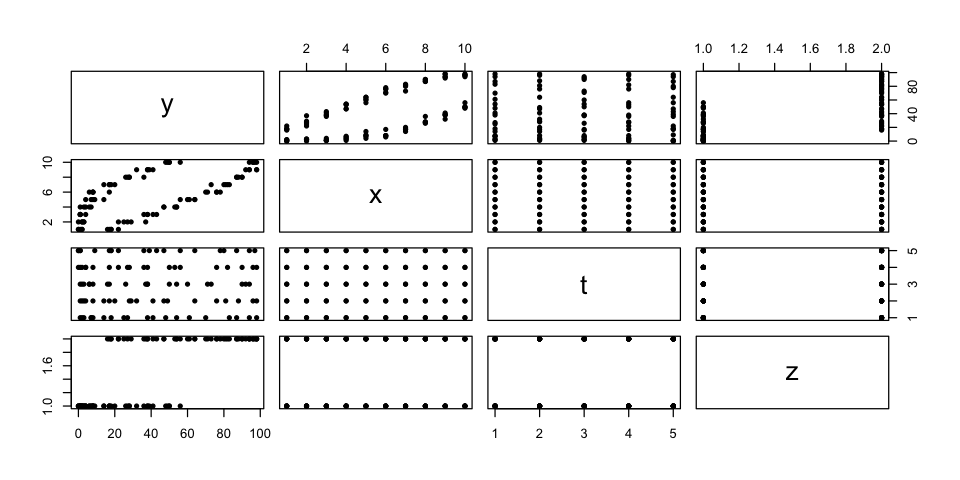

In [9]:
pairs(y ~ x + t + z, datos, pch = 20)

## Ajuste del Modelo

In [10]:
datos.tunned <- datos %>% 
    rename(sucesses = y) %>%
    mutate(failures = 100 - sucesses)

### Modelo Logístico Completo (full)

In [11]:
model.logit.full <- glm(cbind(sucesses, failures) ~ x + t + z, data = datos.tunned, 
                     family = binomial(link = logit))

In [12]:
summary(model.logit.full)


Call:
glm(formula = cbind(sucesses, failures) ~ x + t + z, family = binomial(link = logit), 
    data = datos.tunned)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.28796  -0.60134   0.04575   0.49385   2.41219  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.163053   0.117652 -43.884   <2e-16 ***
x            0.515782   0.012217  42.218   <2e-16 ***
t2           0.044675   0.086293   0.518    0.605    
t3          -0.014940   0.086429  -0.173    0.863    
t4           0.007461   0.086376   0.086    0.931    
t5           0.078046   0.086224   0.905    0.365    
z1           3.101047   0.067702  45.804   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5187.820  on 99  degrees of freedom
Residual deviance:   87.865  on 93  degrees of freedom
AIC: 504.62

Number of Fisher Scoring iterations: 4


Como vemos, en el modelo con todas las variables, la influencia de las categorías formadas por la variable cualitativa *t* no aporta información significativa para el ajuste de la variable $y$. Por lo tanto, se eliminará del modelo para así tratar de simplificar el mismo.

### Modelo Logístico Restringido

In [13]:
model.logit <- glm(cbind(sucesses, failures) ~ x + z, data = datos.tunned, 
             family = binomial(link = logit))

In [14]:
summary(model.logit)


Call:
glm(formula = cbind(sucesses, failures) ~ x + z, family = binomial(link = logit), 
    data = datos.tunned)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.43976  -0.67094   0.02646   0.51833   2.36379  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.13896    0.10388  -49.47   <2e-16 ***
x            0.51568    0.01221   42.22   <2e-16 ***
z1           3.10041    0.06769   45.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5187.820  on 99  degrees of freedom
Residual deviance:   89.401  on 97  degrees of freedom
AIC: 498.15

Number of Fisher Scoring iterations: 4


Con el modelo ajustado únicamente por las variables $X$ y $Z$ se consigue que ahora todos los parámetros sean significativos. A pesar de que en este caso la deviance residual del modelo es mayor ($89.401$ frente a $87.865$ del modelo con todas las variables predictoras), el AIC es menor. Esto es porque la reducción del número de parámetro a estimar "compensa" el peor ajuste del modelo.

### Modelo Normal Inverso (probit)

Para comprobar el ajuste sobre un modelo lineal generalizado con respuesta de tipo binomial diferente al logístico, se va a realizar un ajuste utilizando la función de enlace normal estándar inversa.

In [15]:
model.probit <- glm(cbind(sucesses, failures) ~ x + z, data = datos.tunned,
                    family = binomial(link = probit))

In [16]:
summary(model.probit)


Call:
glm(formula = cbind(sucesses, failures) ~ x + z, family = binomial(link = probit), 
    data = datos.tunned)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0931  -0.6003  -0.1092   0.6668   2.3895  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.937276   0.053728  -54.67   <2e-16 ***
x            0.293968   0.006519   45.09   <2e-16 ***
z1           1.777507   0.035824   49.62   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5187.820  on 99  degrees of freedom
Residual deviance:   92.839  on 97  degrees of freedom
AIC: 501.59

Number of Fisher Scoring iterations: 4


En este caso, el ajuste sigue siendo similar al logístico, obteniendo una deviance residual similiar, junto con un AIC menor que el obtenido por el modelo logístico completo (por el uso de un menor número de variables). Sin embargo, en este caso el modelo no obtiene mejores resultados que el modelo logístico restringido al uso de las variables $X$ y $Z$.

A continuación se incluyen las tablas resumen que recogen los valores del Criterio de Akaike y del Criterio Bayesiano, donde ambos indican el mejor ajuste del modelo logístico restringido.

In [17]:
AIC(model.logit.full, model.logit, model.probit)

,df,AIC
model.logit.full,7,504.6179
model.logit,3,498.1535
model.probit,3,501.5914


In [18]:
BIC(model.logit.full, model.logit, model.probit)

,df,BIC
model.logit.full,7,522.8541
model.logit,3,505.9690
model.probit,3,509.4069


Por lo tanto, el modelo que se ha elegido es el siguiente (donde $y$ en este caso representaría la observacion sin agrupar y $logit(p) = log(\frac{p}{1-p})$):

$$E[logit(y)] = X + Z$$

## Intervalos de Confianza

In [19]:
logit <- function(p) {
    log(p / (1 - p))
}

In [20]:
inv.logit <- function(x) {
    exp(x) / (1 + exp(x))
}

### Odds-Ratio

Los intervalos de confianza para las odd ratios se pueden conseguir a partir de las funciones *confint* (verosimilitud perfil) y *confint.default* (Wald) de manera sencilla.

#### Verosimilitud Perfil

In [21]:
confint(model.logit)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-5.3450602,-4.9378172
x,0.4919734,0.5398608
z1,2.9690507,3.2344230


#### Wald

In [22]:
confint.default(model.logit)

,2.5 %,97.5 %
(Intercept),-5.3425549,-4.9353591
x,0.4917373,0.5396189
z1,2.9677440,3.2330787


Los intervalos basados en ambos métodos son muy similares, por lo que interpretaremos de manera indistinta ambos. [TODO]

### Dosis Letal (40%)

In [23]:
letal <- dose.p(model.logit, p = 0.4)

In [24]:
dosis.pivot <- as.numeric(letal)
dosis.se <- as.numeric(attr(letal, "SE"))

In [25]:
dosis.pivot + c(-1, 1) * qnorm(0.975) * dosis.se

[1] 9.003202 9.355119

### Niveles de Variables Explicativas

In [26]:
aa <- data.frame(x = rep(seq(1, 10), 2), z = as.factor(c(rep(0, 10), rep(1, 10))))

aa$predictions <- inv.logit(predict(model.logit, aa))

In [27]:
aa$lower <- aa$predictions - qnorm(0.95) * sqrt(aa$predictions *  (1 - aa$predictions))
aa$upper <- aa$predictions + qnorm(0.95) * sqrt(aa$predictions *  (1 - aa$predictions))

In [28]:
aa

x,z,predictions,lower,upper
1,0,0.009725037,-0.15169253,0.1711426
2,0,0.016181055,-0.19135247,0.2237146
3,0,0.026806913,-0.23886777,0.2924816
4,0,0.044097847,-0.29361118,0.3818069
5,0,0.071719819,-0.35269094,0.4961306
6,0,0.114569902,-0.40931957,0.6384594
7,0,0.178109262,-0.45121946,0.8074380
8,0,0.266289169,-0.46076450,0.9933428
9,0,0.378045104,-0.41954271,1.1756329
10,0,0.504455892,-0.31793826,1.3268500


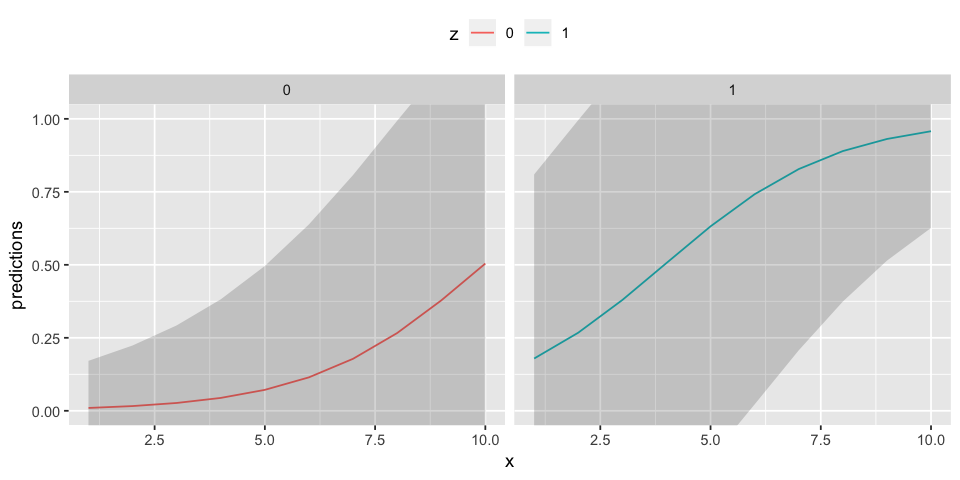

In [29]:
ggplot(aa, aes(y = predictions, x = x, colour = z)) + 
    geom_line() + 
    geom_ribbon(aes(ymin = lower, ymax=upper), alpha = 0.2, colour=NA) + 
    facet_grid(~ z) +
    coord_cartesian(ylim = c(0, 1)) +
    theme(legend.position = "top")